In [1]:
import pandas as pd 
from PyWGCNA import WGCNA as wgcna
import os

In [ ]:
input='/home/sturny/stageLGM/TranscriptomeAtlas/benchmarks/data/1_input'
output='/home/sturny/stageLGM/TranscriptomeAtlas/benchmarks/data/output/wgcna'

In [5]:
counts=pd.read_csv(os.path.join(input,'counts.csv'), index_col=0)
counts=counts[counts.sum(axis=1)>10]
counts = counts.astype(int)
counts=counts.T

counts.to_csv(os.path.join(output, 'filtered_counts.csv'))


In [6]:
pyWGCNA_oeil=wgcna(name='oeil', species='human', geneExpPath='/home/sturny/stageLGM/GEO/benchmarks/data/output/wgcna/filtered_counts.csv', save=True)

Saving data to be True, checking requirements ...
Figure directory does not exist!
Creating figure directory!


Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



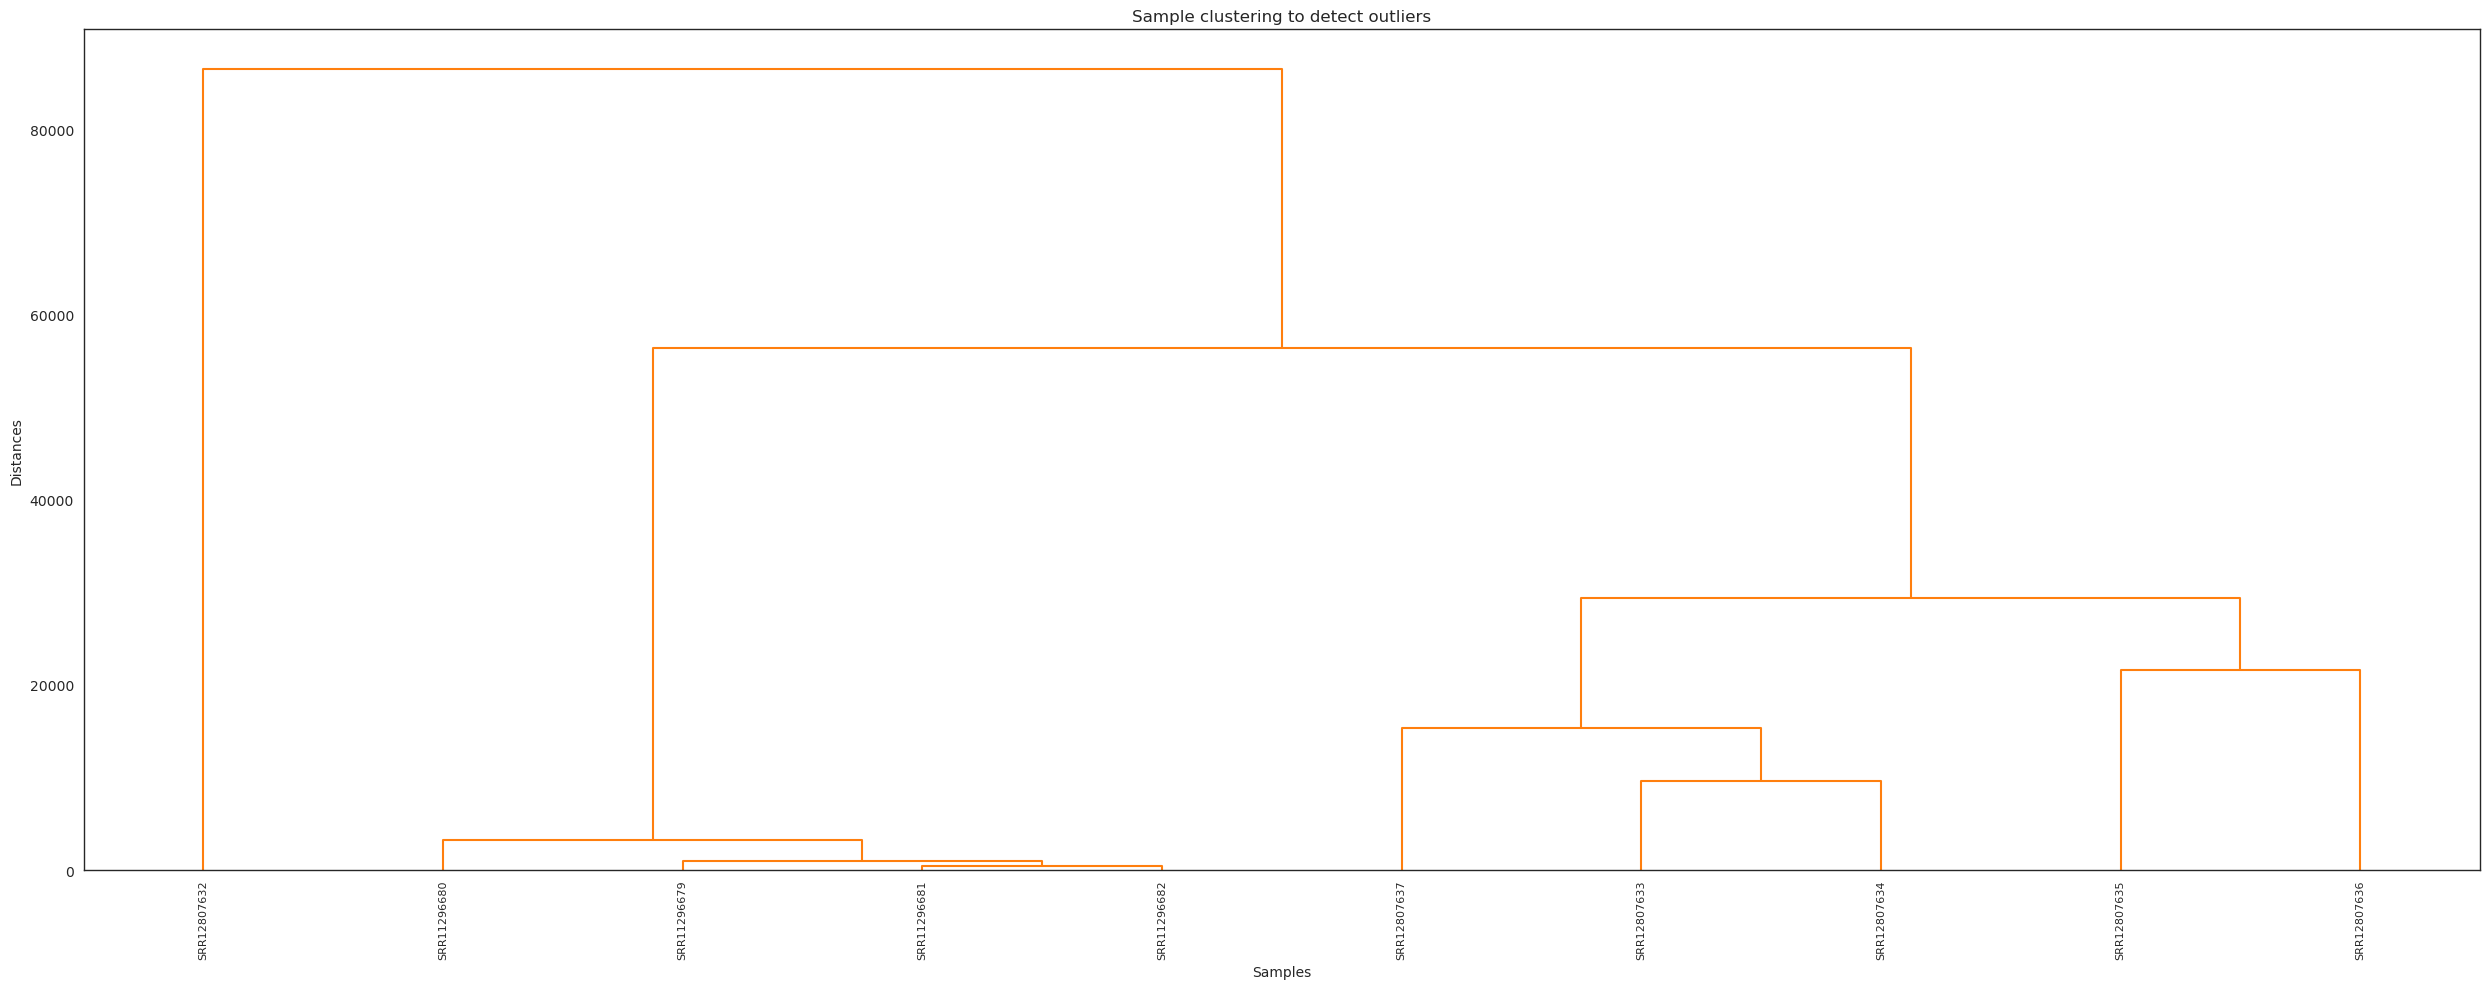

In [7]:
pyWGCNA_oeil.preprocess(show=True)

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  2662
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.390249   0.63094       0.674995  6533.288131  7161.959395   
1       2  0.201865  0.277088       0.170545  4291.381602  4612.954843   
2       3  0.002857  0.023534      -0.264198  3097.371304  3235.650344   
3       4   0.12199 -0.146647      -0.090202  2364.007247  2403.262165   
4       5  0.325454 -0.274119       0.281812  1873.723064  1860.344757   
5       6  0.430772 -0.370511       0.480095   1526.61046  1479.692651   
6       7  0.491813 -0.451766       0.593034  1270.373858  1212.655172   
7       8  0.532687 -0.524117       0.656376  1075.067036  1015.817657   
8       9  0.557254 -0.585694       0.699055   922.368765   862.520736   
9      10   0.57792 -0.639219       0.730302   800.482436   738.509169   
10     11  0.592034 -0.687569       0.755007   701.496036   639.059289   
11     13

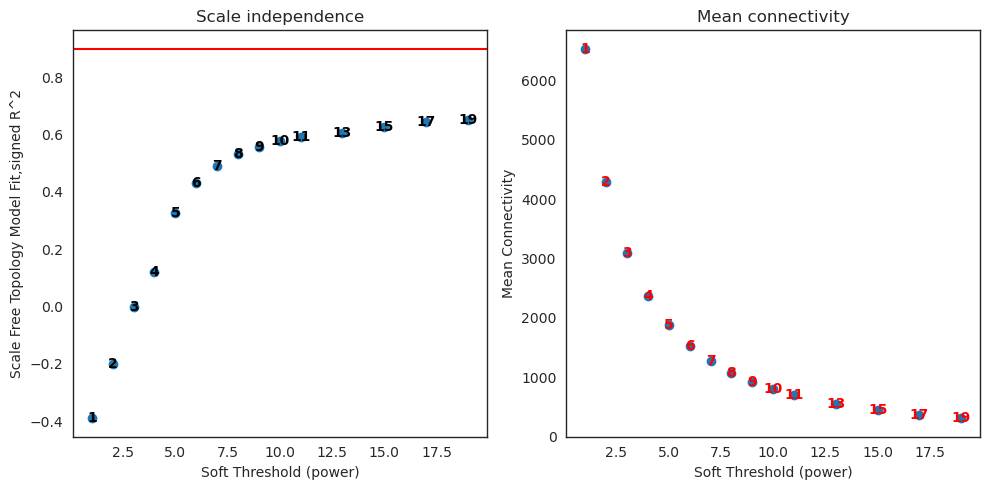

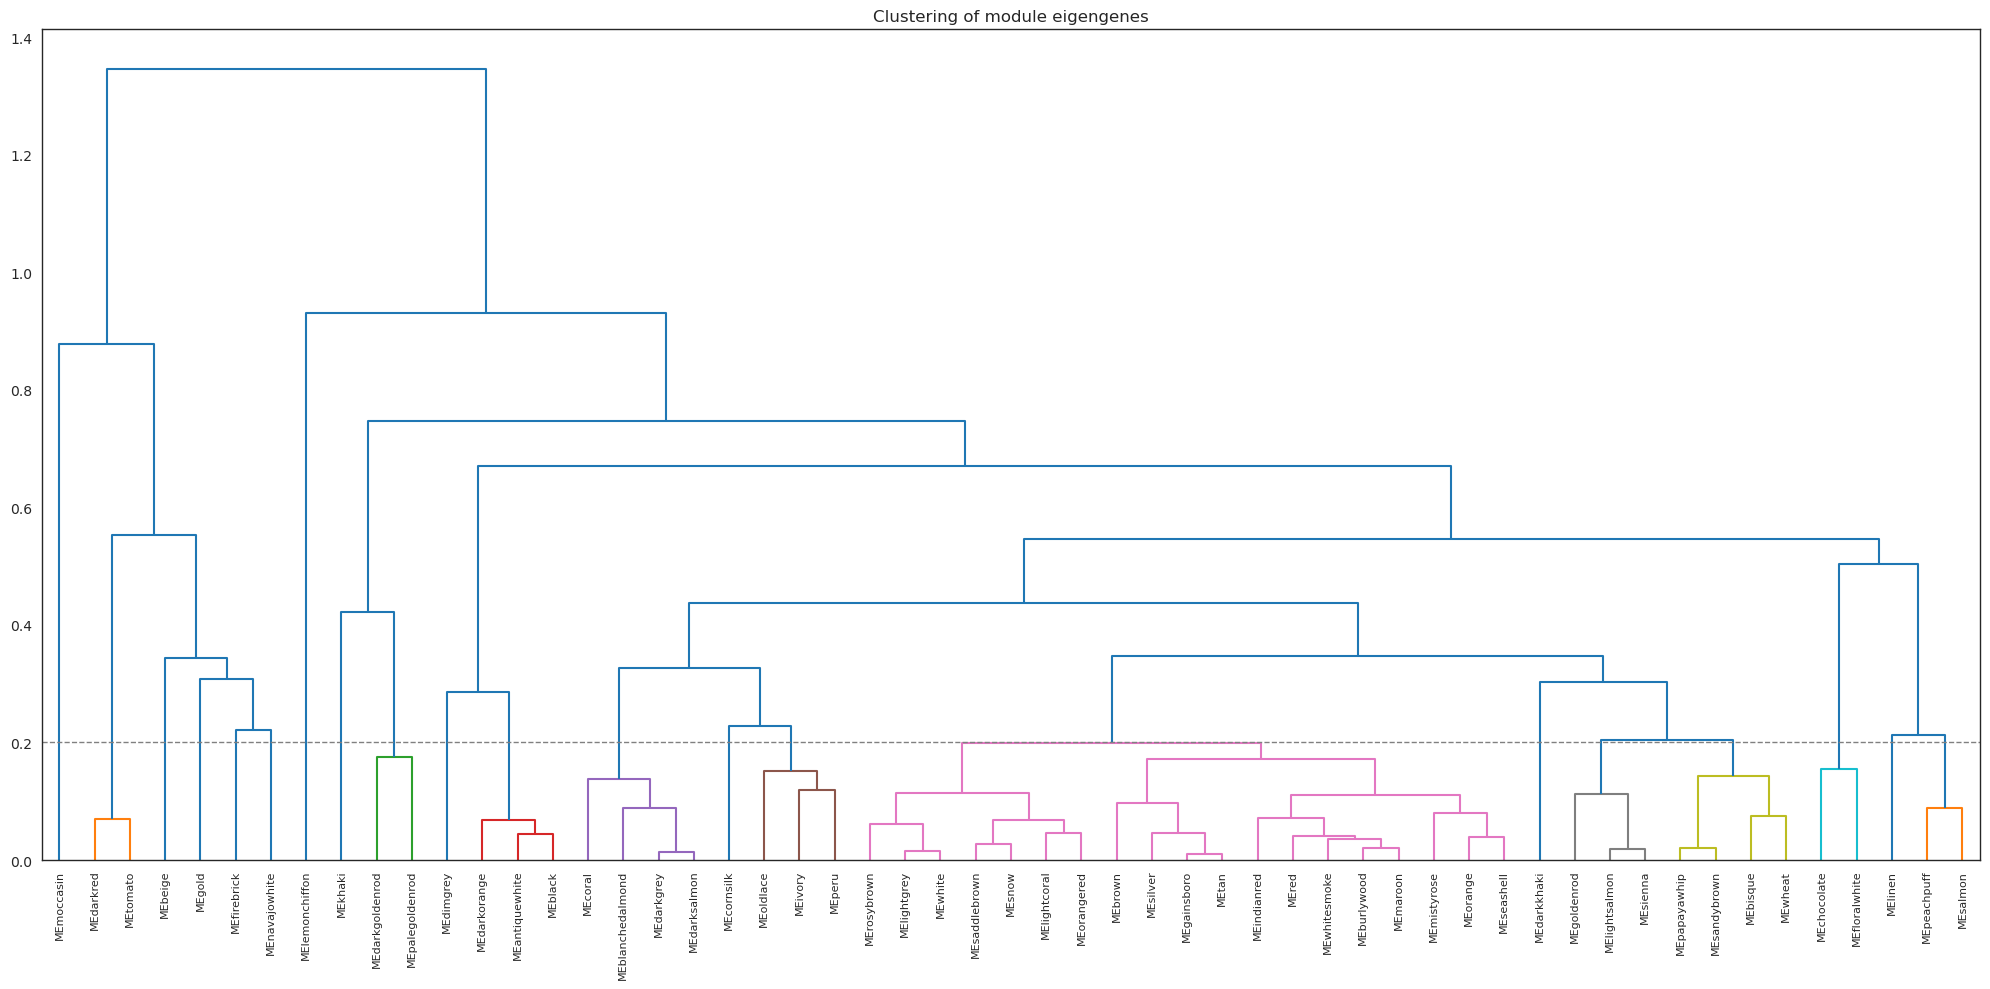

In [8]:
pyWGCNA_oeil.findModules()

In [9]:
eigengenes = pyWGCNA_oeil.MEs


In [10]:
metadata = pd.read_csv(os.path.join(input,'metadata','metadata.csv'), sep=',', index_col=0)



In [11]:
print(metadata.index[:5])
print(pyWGCNA_oeil.MEs.index[:5])


Index(['SRR12807632', 'SRR12807633', 'SRR12807634', 'SRR12807635',
       'SRR12807636'],
      dtype='object', name='SRR')
Index(['SRR12807632', 'SRR12807633', 'SRR12807634', 'SRR12807635',
       'SRR12807636'],
      dtype='object')


In [12]:
print(metadata)


             Sample      GSM      Tissu
SRR                                    
SRR12807632       1  4827279  periphery
SRR12807633       2  4827280  periphery
SRR12807634       3  4827281  periphery
SRR12807635       1  4827282     centre
SRR12807636       2  4827283     centre
SRR12807637       3  4827284     centre
SRR11296679       1  4408813        RPE
SRR11296680       2  4408814        RPE
SRR11296681       3  4408815        RPE
SRR11296682       4  4408816        RPE


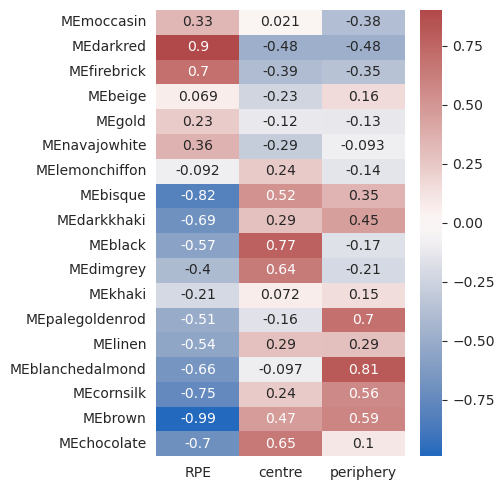

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#binarize
traits_encoded = pd.get_dummies(metadata['Tissu'])

traits_encoded = traits_encoded.loc[pyWGCNA_oeil.MEs.index]


# heatmap
corr_df = pd.DataFrame(index=eigengenes.columns, columns=traits_encoded.columns)

for mod in eigengenes.columns:
    for trait in traits_encoded.columns:
        corr_df.loc[mod, trait] = eigengenes[mod].corr(traits_encoded[trait])

corr_df = corr_df.astype(float)

plt.figure(figsize=(5,5))
sns.heatmap(corr_df, annot=True, cmap='vlag', center=0)
plt.tight_layout()
plt.show()







In [ ]:
#avoir les genes


module_name = "blanchedalmond"

module_colors = pyWGCNA_oeil.datExpr.var['moduleColors']
genes = list(pyWGCNA_oeil.datExpr.var_names)

genes_in_module = [gene for gene, color in zip(genes, module_colors) if color == module_name]

df_genes = pd.DataFrame(genes_in_module, columns=['gene_id'])


print(len(genes_in_module))


NameError: name 'pyWGCNA_oeil' is not defined